In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
%matplotlib inline

In [2]:
df_1301 = pd.read_csv('./data/feature/1301_feature.csv',parse_dates=True,index_col='年月日')
dfl_1301 = pd.read_csv('./data/legal/1301_legal.csv',parse_dates=True,index_col='年月日')
df_1301=df_1301.drop(columns=['證券代碼'])

In [3]:
#preprocessing
X_train,X_test = df_1301.iloc[:round(len(df_1301)*0.7)],df_1301.iloc[round(len(df_1301)*0.7):]

for col in X_train.columns:
    try:
        X_train[col]=X_train[col].str.replace(',','')
    except:
        continue
for col in X_test.columns:
    try:
        X_test[col]=X_test[col].str.replace(',','')
    except:
        continue

X_train= X_train.astype('float32')
X_test = X_test.astype('float32')

C:\Users\joyce\AppData\Local\Temp/ipykernel_7540/3567867220.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col]=X_train[col].str.replace(',','')
C:\Users\joyce\AppData\Local\Temp/ipykernel_7540/3567867220.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col]=X_test[col].str.replace(',','')


In [4]:
#simple autoencoder

encoding_dim = 10
input_data = keras.Input(shape=(24,))
encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_data)
decoded = keras.layers.Dense(24)(encoded)
autoencoder = keras.Model(input_data,decoded)

encoder = keras.Model(input_data, encoded)

encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='Adam',loss='mean_squared_error')
autoencoder.fit(X_train.to_numpy(), X_train.to_numpy(),
                epochs=5000,
                batch_size=256,
                validation_data=(X_test.to_numpy(), X_test.to_numpy())
                )

Epoch 1/5000
6/6 [==============================] - 3s 47ms/step - loss: 1305557073920.0000 - val_loss: 1285208145920.0000
Epoch 2/5000
6/6 [==============================] - 0s 13ms/step - loss: 1233695801344.0000 - val_loss: 1214859051008.0000
Epoch 3/5000
6/6 [==============================] - 0s 12ms/step - loss: 1167274278912.0000 - val_loss: 1150039752704.0000
Epoch 4/5000
6/6 [==============================] - 0s 13ms/step - loss: 1106048843776.0000 - val_loss: 1090349760512.0000
Epoch 5/5000
6/6 [==============================] - 0s 14ms/step - loss: 1049643515904.0000 - val_loss: 1035164385280.0000
Epoch 6/5000
6/6 [==============================] - 0s 11ms/step - loss: 997326454784.0000 - val_loss: 983940136960.0000
Epoch 7/5000
6/6 [==============================] - 0s 13ms/step - loss: 948710998016.0000 - val_loss: 936050950144.0000
Epoch 8/5000
6/6 [==============================] - 0s 12ms/step - loss: 903046889472.0000 - val_loss: 890923319296.0000
Epoch 9/5000
6/6 [====

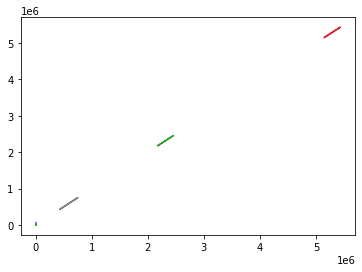

In [5]:
plt.plot(autoencoder.predict(X_test.to_numpy()),X_test.to_numpy())


In [14]:
#sparse autoencoder(正則化)
from keras import regularizers

encoding_dim = 10
input_data = keras.Input(shape=(24,))
encoded = keras.layers.Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_data)
decoded = keras.layers.Dense(24)(encoded)
autoencoder = keras.Model(input_data,decoded)

encoder = keras.Model(input_data, encoded)

encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='Adam',loss='mean_squared_error')
autoencoder.fit(X_train.to_numpy(), X_train.to_numpy(),
                epochs=5000,
                batch_size=256,
                validation_data=(X_test.to_numpy(), X_test.to_numpy()))


Epoch 1/5000
6/6 [==============================] - 0s 17ms/step - loss: 1654138732544.0000 - val_loss: 1649312923648.0000
Epoch 2/5000
6/6 [==============================] - 0s 4ms/step - loss: 1614326792192.0000 - val_loss: 1611352375296.0000
Epoch 3/5000
6/6 [==============================] - 0s 3ms/step - loss: 1577123053568.0000 - val_loss: 1575108739072.0000
Epoch 4/5000
6/6 [==============================] - 0s 4ms/step - loss: 1541679480832.0000 - val_loss: 1540527882240.0000
Epoch 5/5000
6/6 [==============================] - 0s 4ms/step - loss: 1507951247360.0000 - val_loss: 1507495903232.0000
Epoch 6/5000
6/6 [==============================] - 0s 4ms/step - loss: 1475696656384.0000 - val_loss: 1475832840192.0000
Epoch 7/5000
6/6 [==============================] - 0s 4ms/step - loss: 1444698783744.0000 - val_loss: 1445333565440.0000
Epoch 8/5000
6/6 [==============================] - 0s 4ms/step - loss: 1414796148736.0000 - val_loss: 1415796359168.0000
Epoch 9/5000
6/6 [=====

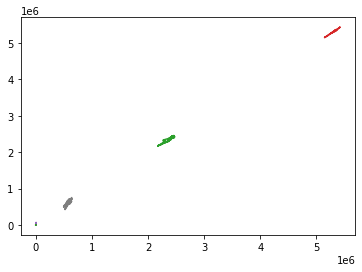

In [15]:
plt.plot(autoencoder.predict(X_test.to_numpy()),X_test.to_numpy())

In [85]:
#deep antuencoder(stacked autoencoder)
from tensorflow.keras import callbacks
from keras import metrics
# callback = callbacks.EarlyStopping(monitor='val_loss')
input_data = keras.Input(shape=(24,))
encoded = keras.layers.Dense(32)(input_data)
encoded = keras.layers.Dense(12)(encoded)

decoded = keras.layers.Dense(32)(encoded)
decoded = keras.layers.Dense(24)(decoded)

autoencoder = keras.Model(input_data, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(X_train, X_train,
                epochs=5000,
                batch_size=128,
                validation_data=(X_test, X_test))

Epoch 1/5000
12/12 [==============================] - 0s 13ms/step - loss: 1725721214976.0000 - val_loss: 986157547520.0000
Epoch 2/5000
12/12 [==============================] - 0s 2ms/step - loss: 666984120320.0000 - val_loss: 390794248192.0000
Epoch 3/5000
12/12 [==============================] - 0s 2ms/step - loss: 234007494656.0000 - val_loss: 80737763328.0000
Epoch 4/5000
12/12 [==============================] - 0s 2ms/step - loss: 31124207616.0000 - val_loss: 9812962304.0000
Epoch 5/5000
12/12 [==============================] - 0s 3ms/step - loss: 12851689472.0000 - val_loss: 9636124672.0000
Epoch 6/5000
12/12 [==============================] - 0s 3ms/step - loss: 4709974016.0000 - val_loss: 1825773056.0000
Epoch 7/5000
12/12 [==============================] - 0s 2ms/step - loss: 2391929344.0000 - val_loss: 1575203840.0000
Epoch 8/5000
12/12 [==============================] - 0s 3ms/step - loss: 1783561856.0000 - val_loss: 992572352.0000
Epoch 9/5000
12/12 [======================

In [86]:
#loss 6位數
autoencoder.summary()

Model: "model_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_60 (InputLayer)        [(None, 24)]              0         
_________________________________________________________________
dense_256 (Dense)            (None, 32)                800       
_________________________________________________________________
dense_257 (Dense)            (None, 12)                396       
_________________________________________________________________
dense_258 (Dense)            (None, 32)                416       
_________________________________________________________________
dense_259 (Dense)            (None, 24)                792       
Total params: 2,404
Trainable params: 2,404
Non-trainable params: 0
_________________________________________________________________


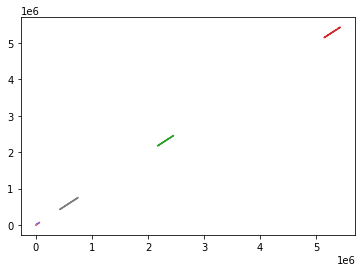

In [80]:
plt.plot(autoencoder.predict(X_test.to_numpy()),X_test.to_numpy())

In [5]:
#seq2seq autoencoder(1166 in formal data)
timesteps = 60  # Length of your sequences
input_dim = 24   #
latent_dim = 1166  #

inputs = keras.Input(shape=(timesteps, input_dim))
encoded = keras.layers.LSTM(latent_dim)(inputs)

decoded = keras.layers.RepeatVector(timesteps)(encoded)
decoded = keras.layers.LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = keras.Model(inputs, decoded)
encoder = keras.Model(inputs, encoded)

In [ ]:
#subclass API範例
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)